### Context

Diabetic retinopathy is a severe complication of diabetes that can cause blindness if left undiagnosed and untreated. With one in three people with diabetes having some degree of diabetic retinopathy, an accurate and early diagnosis is critical for appropriate treatment. In this project, we will use the Diabetic Retinopathy Debrecen dataset to classify eyes as either having diabetic retinopathy or being normal. This dataset contains features extracted from the Messidor image set and is used to predict whether an image contains signs of diabetic retinopathy or not.

This project has two parts. The first part involves implementing and training a multilayer feedforward neural network to classify the data. The second part involves applying computational intelligence techniques to classify the data based on various features. In the first part, we will convert the dataset from .ARFF format to .CSV format, load the dataset into a programming environment, visualize the distribution of features and classes, normalize each feature, and then construct a three-layer feedforward network. We will use a high-level programming language like Python, C/C++, or Java to train and test the neural network using the Backpropagation algorithm. In the second part, we will retrieve the datasets prepared in the first part, construct, train, and test a multilayer feedforward neural network with the same datasets using a selected machine learning library like scikitlearn or Keras.

We will detail the hyperparameters and training rules/algorithms adopted in the report and compare the performance of this model with the neural network classifier trained in Part 1. Additionally, we will explore how some advanced measures like AUC can be used for performance evaluation of these neural network classifiers. We will then tune the parameters or training rules/algorithms of our neural network model and re-train it so that testing performance of the model is improved. We will also construct a new machine learning model using different neural network or classifier architecture like support vector machines, decision tree, or random forest and train and test the new model using the same datasets. Finally, we will explain how the neural network model in Step 3.3 can be optimized using genetic algorithms, specifically discussing what performance metrics or objective functions we want to optimize, what optimizing variables we consider, how a candidate neural network model is encoded in a chromosome, and how crossover operator and mutation operator are devised.

### Attribute Informations

- 0) The binary result of quality assessment. 0 = bad quality 1 = sufficient quality. 
- 1) The binary result of pre-screening, where 1 indicates severe retinal abnormality and 0 its lack. 
- 2-7) The results of MA detection. Each feature value stand for the number of MAs found at the confidence levels alpha = 0.5, . . . , 1, respectively. 
- 8-15) contain the same information as 2-7) for exudates. However, as exudates are represented by a set of points rather than the number of pixels constructing the lesions, these features are normalized by dividing the number of lesions with the diameter of the ROI to compensate different image sizes. 
- 16) The euclidean distance of the center of the macula and the center of the optic disc to provide important information regarding the patientâ€™s condition. This feature is also normalized with the diameter of the ROI. 
- 17) The diameter of the optic disc. 
- 18) The binary result of the AM/FM-based classification. 
- 19) Class label. 1 = contains signs of DR (Accumulative label for the Messidor classes 1, 2, 3), 0 = no signs of DR.

### Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.io import arff
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

### Dataset

In [2]:
# Load ARFF file
data = arff.loadarff('messidor_features.arff')

# Convert to pandas DataFrame
df = pd.DataFrame(data[0])

# Save as CSV file
df.to_csv('messidor_features.csv', index=False)

In [3]:
# Load dataset
df = pd.read_csv('messidor_features.csv')

### Part 1

#### 1.1 Visualize the distribution of features and classes and drop some columns

In [4]:
df.head(n=6)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Class
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,b'0'
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,b'0'
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,b'1'
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,b'0'
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,b'1'
5,1.0,1.0,44.0,43.0,41.0,41.0,37.0,29.0,28.356400,6.935636,2.305771,0.323724,0.000000,0.000000,0.000000,0.000000,0.502831,0.126741,0.0,b'1'


In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000
mean,0.996525,0.918332,38.428323,36.909644,35.140747,32.297133,28.747176,21.151173,64.096674,23.088012,8.704610,1.836489,0.560738,0.212290,0.085674,0.037225,0.523212,0.108431,0.336229
std,0.058874,0.273977,25.620913,24.105612,22.805400,21.114767,19.509227,15.101560,58.485289,21.602696,11.567589,3.923224,2.484111,1.057126,0.398717,0.178959,0.028055,0.017945,0.472624
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.349274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.367762,0.057906,0.000000
25%,1.000000,1.000000,16.000000,16.000000,15.000000,14.000000,11.000000,8.000000,22.271597,7.939315,1.249050,0.081554,0.000000,0.000000,0.000000,0.000000,0.502855,0.095799,0.000000
50%,1.000000,1.000000,35.000000,35.000000,32.000000,29.000000,25.000000,18.000000,44.249119,17.038020,4.423472,0.484829,0.022248,0.001554,0.000000,0.000000,0.523308,0.106623,0.000000
75%,1.000000,1.000000,55.000000,53.000000,51.000000,48.000000,43.000000,32.000000,87.804112,31.305692,11.766880,1.921648,0.191953,0.038450,0.004832,0.003851,0.543670,0.119591,1.000000
max,1.000000,1.000000,151.000000,132.000000,120.000000,105.000000,97.000000,89.000000,403.939108,167.131427,106.070092,59.766121,51.423208,20.098605,5.937799,3.086753,0.592217,0.219199,1.000000


In [6]:
df.shape

(1151, 20)

In [7]:
#Missing Values Check
df.isnull().sum().sum()

0

In [8]:
# Separate input features and class labels
features = df.iloc[:, :-1] # all columns except the last one
y = df.iloc[:, -1]  # only the last column

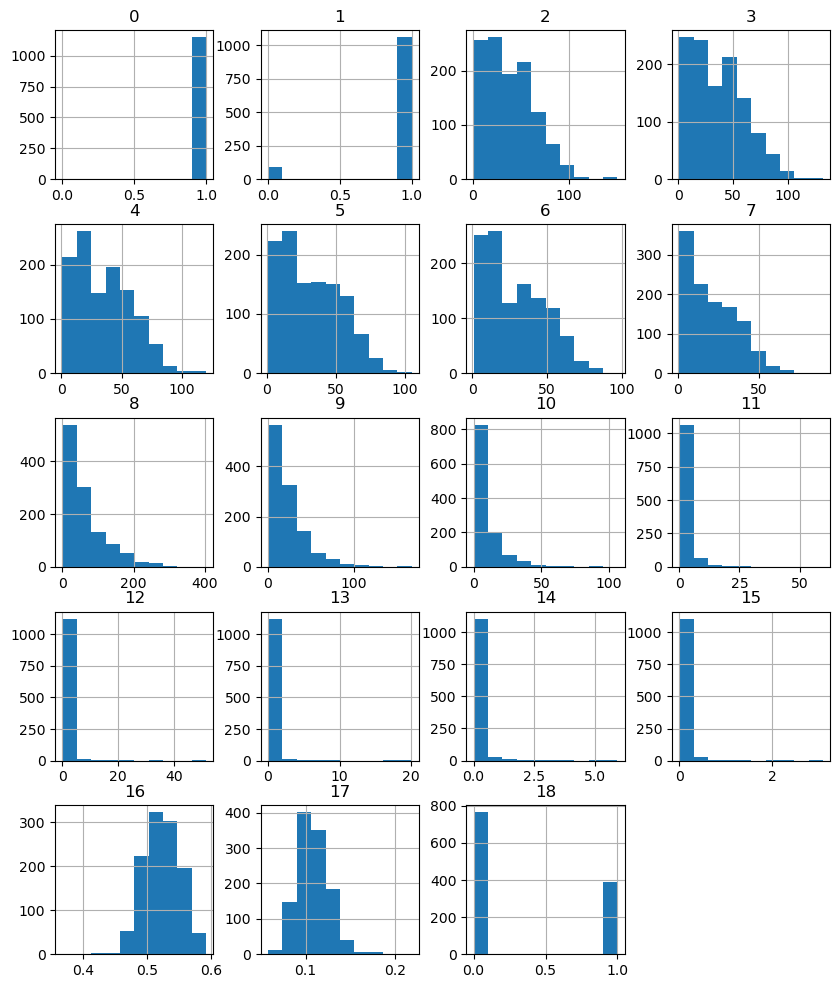

In [9]:
# Histogram of each feature
features.hist(figsize=(10, 12))
plt.show()

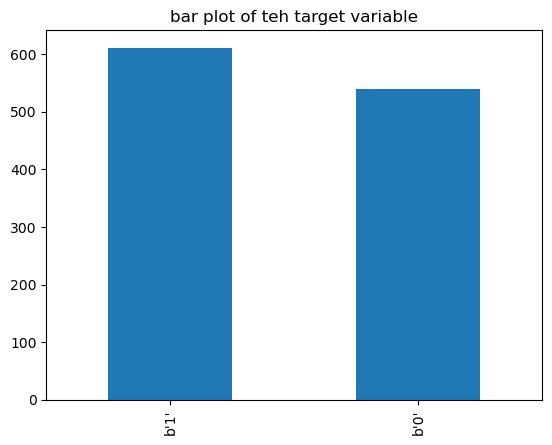

In [10]:
# Bar plot of class labels
y.value_counts().plot(kind='bar')
plt.title('bar plot of teh target variable')
plt.show()

In [11]:
# Replace column value
y = y.replace("b'0'", 0)
y = y.replace("b'1'", 1)

y

0       0
1       0
2       1
3       0
4       1
       ..
1146    0
1147    0
1148    0
1149    1
1150    0
Name: Class, Length: 1151, dtype: int64

I would suggest dropping columns 0 and 1 for the following reasons:

- **Column 0:** The binary result of quality assessment. 0 = bad quality 1 = sufficient quality. Since all the images in the dataset have already passed the quality assessment and have been included in the dataset, this feature may not provide any meaningful information for our analysis. Therefore, we can drop this column without losing any useful information.

- **Column 1:** The binary result of pre-screening, where 1 indicates severe retinal abnormality and 0 its lack. Since this column only indicates the presence or absence of severe retinal abnormality, it may not provide much useful information for our analysis. Moreover, since we are interested in predicting signs of diabetic retinopathy (DR), we can assume that all the images in the dataset have some degree of retinal abnormality, and hence this feature may not be particularly relevant. Therefore, we can drop this column without losing any useful information.

In [12]:
# Drop columns 0 and 1
features.drop(columns=['0', '1'], inplace=True)

#### 1.2 Normalize each feature to the range of [0,1]

In [13]:
# perform normalization on numerical variables only


scaler = MinMaxScaler()
X_norm = scaler.fit_transform(features[features.columns[:-1]])

features[features.columns[:-1]] = X_norm

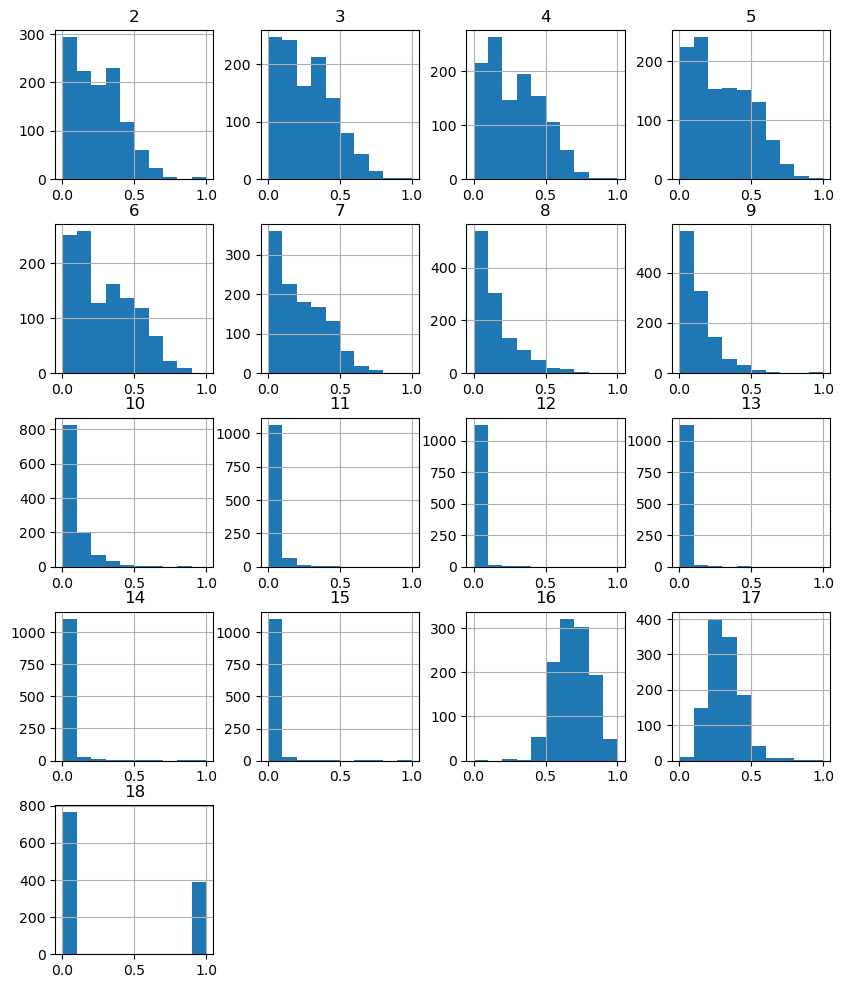

In [14]:
# Histogram of each feature
features.hist(figsize=(10, 12))
plt.show()

#### 1.3 Divide the whole dataset into two groups randomly.

In [15]:
# Split into training and testing sets with a 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)

#### 1.4 Write a computer program using a high-level programming language of your choice (Python with NumPy.

In [16]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        self.weights1 = np.random.randn(self.input_size, self.hidden_size)
        self.bias1 = np.zeros((1, self.hidden_size))
        
        self.weights2 = np.random.randn(self.hidden_size, self.output_size)
        self.bias2 = np.zeros((1, self.output_size))
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def forward(self, X):
        self.z1 = np.dot(X, self.weights1) + self.bias1
        self.a1 = self.sigmoid(self.z1)
        
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.a2 = self.sigmoid(self.z2)
        
        return self.a2
    
    def backward(self, X, y, output, learning_rate):
        self.error = y - output
        self.delta_output = self.error * self.sigmoid_derivative(output)
        
        self.error_hidden = np.dot(self.delta_output, self.weights2.T)
        self.delta_hidden = self.error_hidden * self.sigmoid_derivative(self.a1)
        
        self.weights1 += learning_rate * np.dot(X.T, self.delta_hidden)
        self.bias1 += learning_rate * np.sum(self.delta_hidden, axis=0, keepdims=True)
        
        self.weights2 += learning_rate * np.dot(self.a1.T, self.delta_output)
        self.bias2 += learning_rate * np.sum(self.delta_output, axis=0, keepdims=True)
    
    def train(self, X, y, epochs, learning_rate):
        mse_history = []
        for i in range(epochs):
            output = self.forward(X)
            mse = np.mean((y - output)**2)
            mse_history.append(mse)
            self.backward(X, y, output, learning_rate)
        return mse_history
    
    def predict(self, X):
        return np.round(self.forward(X))


#### 1.5	Construct a 3-layers feedforward network with X input neurons, 20 hidden neurons

To construct a 3-layers feedforward network, you can set the number of input neurons to 17 (the number of input features) and the number of output neurons to 1 . For the hidden layer, you can set the number of neurons to 20 as specified.

As for the choice of 20 hidden neurons, it is a common practice to experiment with different values to find the optimal number of neurons for a specific problem. However, 20 neurons can be a good starting point, and you can adjust this value based on the performance of the network.

In [17]:
# Identify the values of X and Y
X = features.shape[1]
Y = 1

In [18]:
# Initialize the neural network
nn = NeuralNetwork(X, 20, Y)

#### 1.6 Plot the training curve

##### 1.6.1 learning rate = 0.1

In [19]:
# Initialize the neural network with 3 input neurons, 20 hidden neurons, and 1 output neuron
nn = NeuralNetwork(input_size=X, hidden_size=20, output_size=Y)

# Train the neural network for 1000 epochs
mse_history = nn.train(X_train.values, y_train.values.reshape(-1,1), epochs=1000, learning_rate = 0.1)

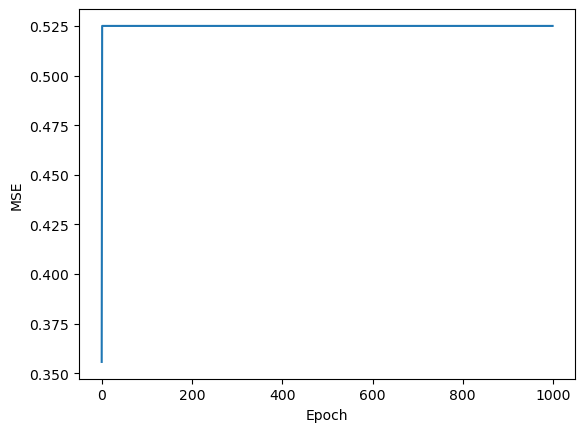

In [20]:
# Plot the training curve
plt.plot(mse_history)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

In [21]:
# Evaluate the performance of the trained network on the test data
y_pred = nn.predict(X_test)
y_pred_binary = np.round(y_pred)
confusion = confusion_matrix(y_test, y_pred_binary)
tn, fp, fn, tp = confusion.ravel()
fp_rate = fp / (fp + tn)
tp_rate = tp / (tp + fn)
accuracy = accuracy_score(y_test, y_pred_binary)

# Print the performance metrics
print('FP rate:', fp_rate)
print('TP rate:', tp_rate)
print('Accuracy:', accuracy)

FP rate: 0.0
TP rate: 0.0
Accuracy: 0.4458874458874459


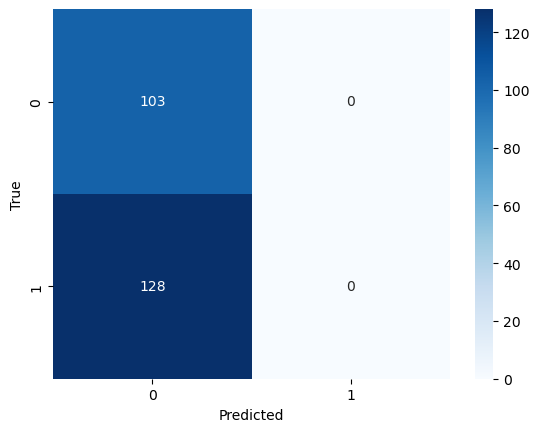

In [22]:
# plot the confusion matrix as a heatmap using seaborn library
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [23]:
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       0.45      1.00      0.62       103
           1       0.00      0.00      0.00       128

    accuracy                           0.45       231
   macro avg       0.22      0.50      0.31       231
weighted avg       0.20      0.45      0.28       231



##### 1.6.2 learning rate = 0.001

In [24]:
# Initialize the neural network with 3 input neurons, 20 hidden neurons, and 1 output neuron
nn = NeuralNetwork(input_size=X, hidden_size=20, output_size=Y)

# Train the neural network for 1000 epochs
mse_history = nn.train(X_train.values, y_train.values.reshape(-1,1), epochs=1000, learning_rate = 0.01)

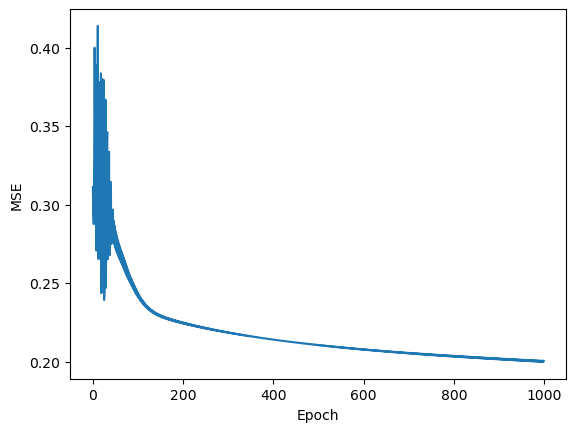

In [25]:
# Plot the training curve
plt.plot(mse_history)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

In [26]:
# Evaluate the performance of the trained network on the test data
y_pred = nn.predict(X_test)
y_pred_binary = np.round(y_pred)
confusion = confusion_matrix(y_test, y_pred_binary)
tn, fp, fn, tp = confusion.ravel()
fp_rate = fp / (fp + tn)
tp_rate = tp / (tp + fn)
accuracy = accuracy_score(y_test, y_pred_binary)

# Print the performance metrics
print('FP rate:', fp_rate)
print('TP rate:', tp_rate)
print('Accuracy:', accuracy)

FP rate: 0.5339805825242718
TP rate: 0.8203125
Accuracy: 0.6623376623376623


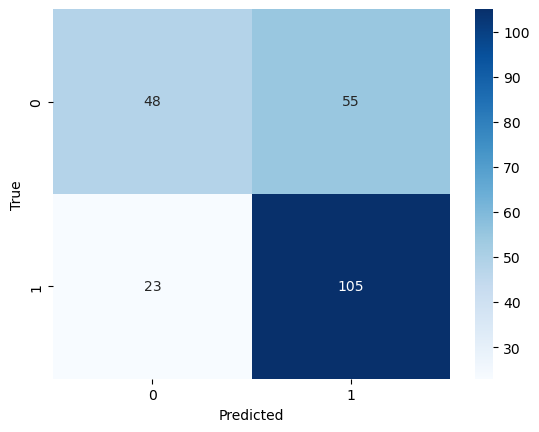

In [27]:
# plot the confusion matrix as a heatmap using seaborn library
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [28]:
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       0.68      0.47      0.55       103
           1       0.66      0.82      0.73       128

    accuracy                           0.66       231
   macro avg       0.67      0.64      0.64       231
weighted avg       0.67      0.66      0.65       231



##### 1.6.3 neural network classifier with 12 hidden neurons 

In [29]:
# Initialize the neural network with 3 input neurons, 12 hidden neurons, and 1 output neuron
nn = NeuralNetwork(input_size=X, hidden_size=12, output_size=Y)

# Train the neural network for 1000 epochs
mse_history = nn.train(X_train.values, y_train.values.reshape(-1,1), epochs=1000, learning_rate = 0.01)

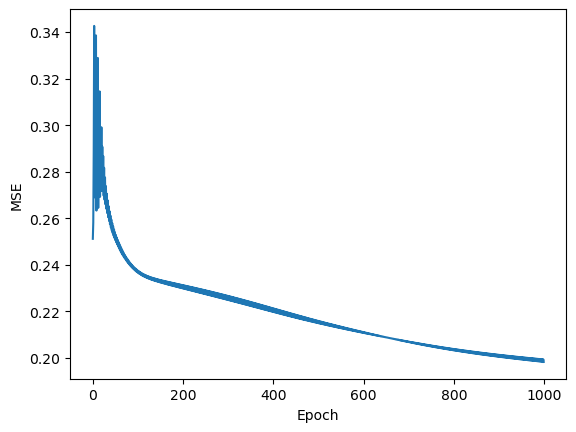

In [30]:
# Plot the training curve
plt.plot(mse_history)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

In [31]:
# Evaluate the performance of the trained network on the test data
y_pred = nn.predict(X_test)
y_pred_binary = np.round(y_pred)
confusion = confusion_matrix(y_test, y_pred_binary)
tn, fp, fn, tp = confusion.ravel()
fp_rate = fp / (fp + tn)
tp_rate = tp / (tp + fn)
accuracy = accuracy_score(y_test, y_pred_binary)

# Print the performance metrics
print('FP rate:', fp_rate)
print('TP rate:', tp_rate)
print('Accuracy:', accuracy)

FP rate: 0.06796116504854369
TP rate: 0.40625
Accuracy: 0.6406926406926406


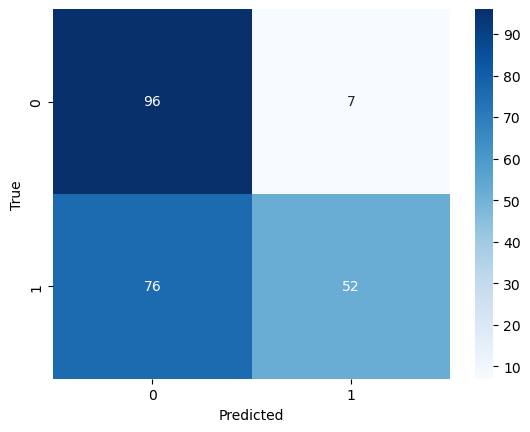

In [32]:
# plot the confusion matrix as a heatmap using seaborn library
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [33]:
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       0.56      0.93      0.70       103
           1       0.88      0.41      0.56       128

    accuracy                           0.64       231
   macro avg       0.72      0.67      0.63       231
weighted avg       0.74      0.64      0.62       231



##### 1.6.4 neural network classifier with 30 hidden neurons 

In [34]:
# Initialize the neural network with 3 input neurons, 30 hidden neurons, and 1 output neuron
nn = NeuralNetwork(input_size=X, hidden_size=30, output_size=Y)

# Train the neural network for 1000 epochs
mse_history = nn.train(X_train.values, y_train.values.reshape(-1,1), epochs=1000, learning_rate = 0.01)

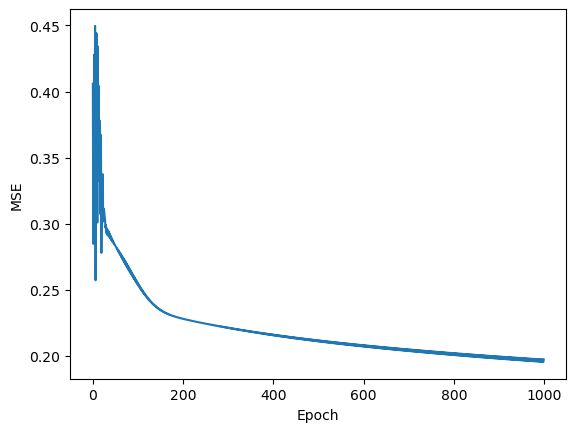

In [35]:
# Plot the training curve
plt.plot(mse_history)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

In [36]:
# Evaluate the performance of the trained network on the test data
y_pred = nn.predict(X_test)
y_pred_binary = np.round(y_pred)
confusion = confusion_matrix(y_test, y_pred_binary)
tn, fp, fn, tp = confusion.ravel()
fp_rate = fp / (fp + tn)
tp_rate = tp / (tp + fn)
accuracy = accuracy_score(y_test, y_pred_binary)

# Print the performance metrics
print('FP rate:', fp_rate)
print('TP rate:', tp_rate)
print('Accuracy:', accuracy)

FP rate: 0.5048543689320388
TP rate: 0.8359375
Accuracy: 0.683982683982684


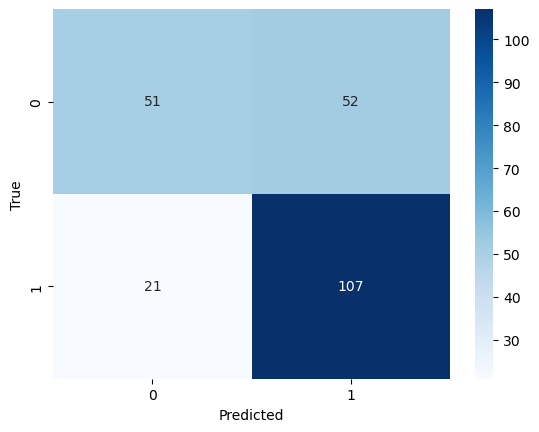

In [37]:
# plot the confusion matrix as a heatmap using seaborn library
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [38]:
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       0.71      0.50      0.58       103
           1       0.67      0.84      0.75       128

    accuracy                           0.68       231
   macro avg       0.69      0.67      0.66       231
weighted avg       0.69      0.68      0.67       231



### Part 2

#### 2.1 Dataset

In [39]:
features

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.140000,0.160305,0.176471,0.173077,0.177083,0.147727,0.122764,0.106359,0.049693,0.012913,0.000362,0.000342,0.000661,0.001271,0.530801,0.261133,1.0
1,0.153333,0.175573,0.176471,0.163462,0.156250,0.136364,0.142126,0.142403,0.031351,0.003918,0.000076,0.000194,0.000657,0.001264,0.682302,0.536341,0.0
2,0.406667,0.450382,0.487395,0.509615,0.479167,0.363636,0.137472,0.167497,0.119614,0.081188,0.027106,0.018571,0.007043,0.002509,0.726836,0.437973,0.0
3,0.360000,0.396947,0.436975,0.471154,0.437500,0.340909,0.099403,0.110368,0.085971,0.051525,0.016340,0.013555,0.001289,0.000496,0.514678,0.352675,0.0
4,0.286667,0.328244,0.361345,0.384615,0.395833,0.295455,0.043799,0.051281,0.003869,0.000000,0.000000,0.000000,0.000000,0.000000,0.481936,0.407122,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,0.220000,0.251908,0.277311,0.307692,0.312500,0.261364,0.014179,0.005609,0.000294,0.000052,0.000000,0.000000,0.000000,0.000000,0.756089,0.365106,0.0
1147,0.320000,0.366412,0.403361,0.461538,0.458333,0.409091,0.155722,0.163809,0.076060,0.016390,0.000030,0.000000,0.000000,0.000000,0.663701,0.410954,0.0
1148,0.320000,0.358779,0.394958,0.423077,0.437500,0.363636,0.074612,0.083569,0.016624,0.002307,0.000218,0.000000,0.000000,0.000000,0.859281,0.446002,0.0
1149,0.253333,0.267176,0.235294,0.211538,0.125000,0.068182,0.099548,0.075419,0.044696,0.018030,0.010958,0.016263,0.040346,0.056559,0.526653,0.302456,1.0


In [40]:
y

0       0
1       0
2       1
3       0
4       1
       ..
1146    0
1147    0
1148    0
1149    1
1150    0
Name: Class, Length: 1151, dtype: int64

In [41]:
# Split into training and testing sets with a 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)

#### 2.2 Multilayer feedforward neural network

In [42]:
# Define the model
model = Sequential()
model.add(Dense(20, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [43]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
23/23 [==============================] - 1s 14ms/step - loss: 0.7328 - accuracy: 0.4293 - val_loss: 0.7176 - val_accuracy: 0.4293
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.7084 - accuracy: 0.4266 - val_loss: 0.6983 - val_accuracy: 0.4348
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.4851 - val_loss: 0.6904 - val_accuracy: 0.5380
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5190 - val_loss: 0.6857 - val_accuracy: 0.5435
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6862 - accuracy: 0.5326 - val_loss: 0.6824 - val_accuracy: 0.5707
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6819 - accuracy: 0.5448 - val_loss: 0.6786 - val_accuracy: 0.5815
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6786 - accuracy: 0.5543 - val_loss: 0.6758 - val_accuracy: 0.5924
Epoch 8/100


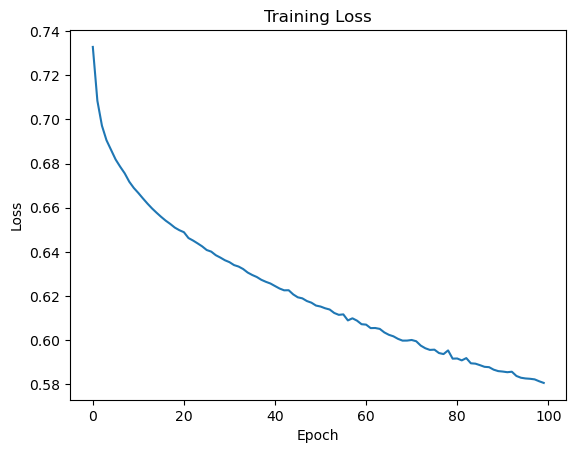

In [44]:
# Plot the training loss over epochs
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [45]:
# Evaluate the model on the testing set
y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print('Confusion Matrix:\n', cm)
print('Accuracy:', accuracy)
print('ROC AUC Score:', roc_auc)

8/8 [==============================] - 0s 1ms/step
Confusion Matrix:
 [[72 31]
 [48 80]]
Accuracy: 0.658008658008658
ROC AUC Score: 0.6620145631067961


#### 2.3 Tune the parameters of the neural network model

In [46]:
# define the neural network model
def create_model(neurons=1):
    model = Sequential()
    model.add(Dense(neurons, input_dim=17, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [47]:
# create the Keras classifier for GridSearchCV
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=32, verbose=0)

# define the grid search parameters
param_grid = {'neurons': [10, 15, 20, 25, 30]}

# create the grid search object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# perform the grid search
grid_result = grid.fit(X_train, y_train)

# print the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.700000 using {'neurons': 25}


In [48]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, std, param))

0.671739 (0.021355) with: {'neurons': 10}
0.673913 (0.015752) with: {'neurons': 15}
0.690217 (0.025259) with: {'neurons': 20}
0.700000 (0.028009) with: {'neurons': 25}
0.689130 (0.023414) with: {'neurons': 30}


In [49]:
# Create the neural network model with the optimal learning rate
model = Sequential()
model.add(Dense(25, input_dim=17, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
optimizer = Adam(lr=0.001)


# Compile the model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model on the training data
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
29/29 [==============================] - 1s 2ms/step - loss: 0.7068 - accuracy: 0.5022
Epoch 2/100
29/29 [==============================] - 0s 1ms/step - loss: 0.6850 - accuracy: 0.5565
Epoch 3/100
29/29 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.5815
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.5924
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.6011
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.6130
Epoch 7/100
29/29 [==============================] - 0s 1ms/step - loss: 0.6604 - accuracy: 0.6011
Epoch 8/100
29/29 [==============================] - 0s 1ms/step - loss: 0.6571 - accuracy: 0.6098
Epoch 9/100
29/29 [==============================] - 0s 1ms/step - loss: 0.6556 - accuracy: 0.6033
Epoch 10/100
29/29 [==============================] - 0s 1ms/step - loss: 0.6518 - accuracy: 0.6076
Epoch 11/

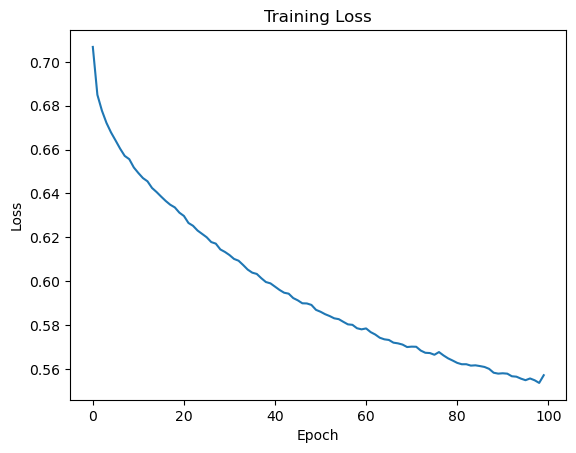

In [50]:
# Plot the training loss over epochs
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [51]:
# Evaluate the model on the testing set
y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print('Confusion Matrix:\n', cm)
print('Accuracy:', accuracy)
print('ROC AUC Score:', roc_auc)

8/8 [==============================] - 0s 0s/step
Confusion Matrix:
 [[78 25]
 [50 78]]
Accuracy: 0.6753246753246753
ROC AUC Score: 0.6833282766990292


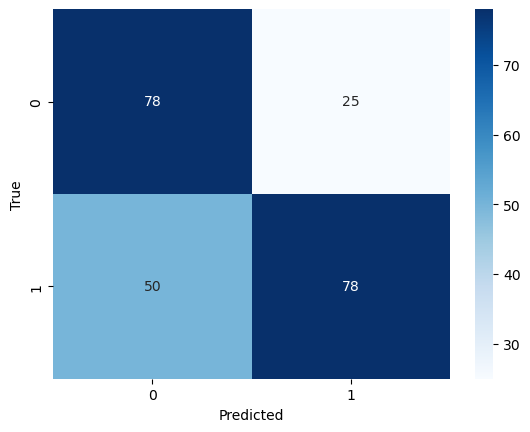

In [52]:
# plot the confusion matrix as a heatmap using seaborn library
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### 2.4 Trying SVM

In [53]:
# Define the SVM model and set the hyperparameters
model = svm.SVC(kernel='rbf', C=1, gamma='scale')

# Train the SVM model
model.fit(X_train, y_train)

# Predict the classes of the testing set using the trained SVM model
y_pred = model.predict(X_test)

# Evaluate the performance of the SVM model using various metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)

Confusion Matrix:
 [[87 16]
 [58 70]]
Accuracy: 0.6796536796536796
ROC AUC Score: 0.6957675970873787


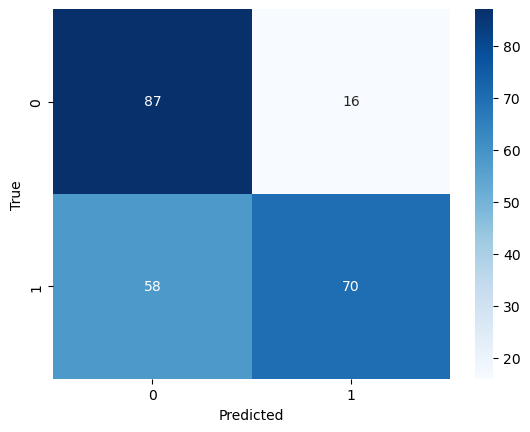

In [54]:
# plot the confusion matrix as a heatmap using seaborn library
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### 2.5 Trying Decision Tree

In [55]:
# Train a decision tree classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Test the classifier
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the results
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)

Confusion Matrix:
 [[57 46]
 [46 82]]
Accuracy: 0.6017316017316018
ROC AUC Score: 0.5970115291262136


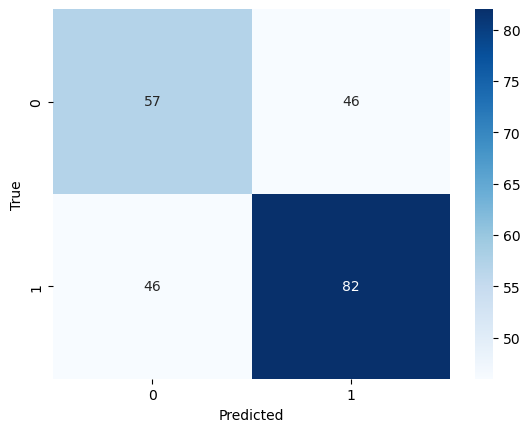

In [56]:
# plot the confusion matrix as a heatmap using seaborn library
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()